# Activity 1.1 : Neural Networks

- Name: Kurt Gabriel A. Anduque
- Section: BSCPE32S4

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [2]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

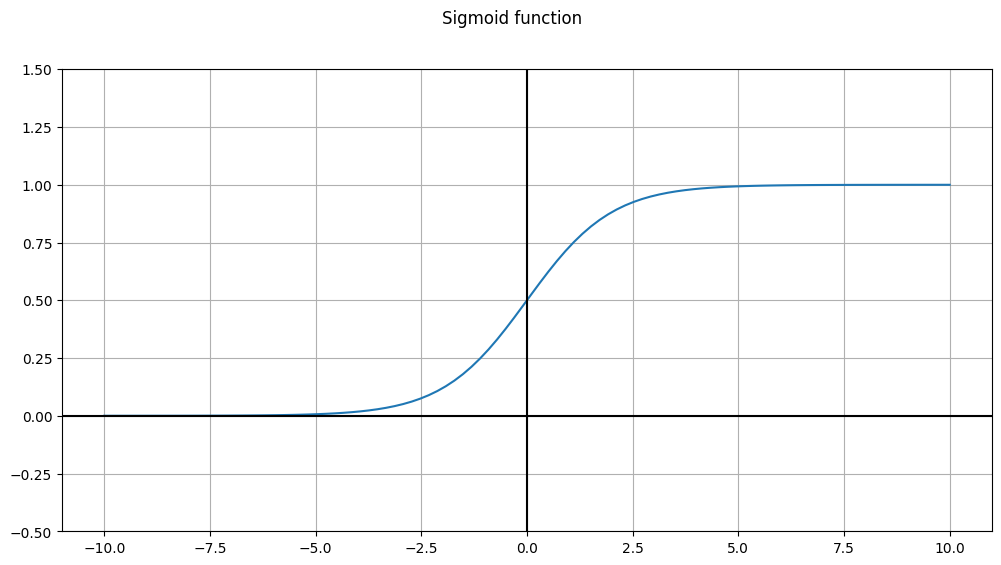

In [3]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Choose any activation function and create a method to define that function.

In [4]:
#type your code here
def relu_func(values):
    return_val = []
    for x in values:
        return_val.append(max(0,x))
    return return_val

Plot the activation function

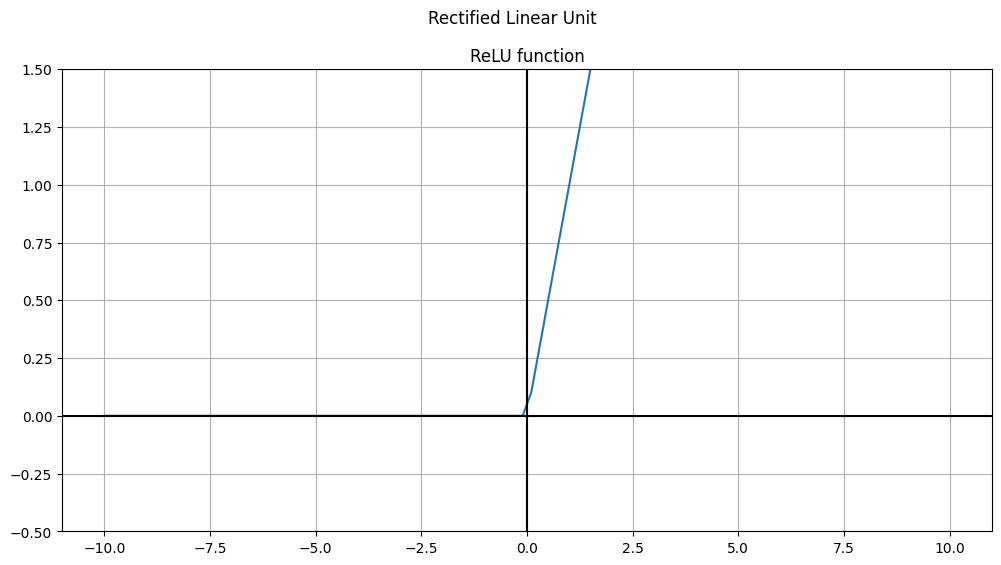

In [5]:
#type your code here

# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = relu_func(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Rectified Linear Unit')
plt.title('ReLU function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be? 
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [6]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [7]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table. 

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [8]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 10
w2 = 10
b = -10
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

<b>NOR

In [10]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = -1
w2 = -1
b = 1
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


<b>NAND

In [239]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = -1
w2 = -1
b = 1.1
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [300]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a , b)
    result = and_gate(round(c), round(d))
    return result
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks 

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [13]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


1. Get the product of array x_in and W_1 (z2)


In [14]:
#type your code here
z2 = np.dot(x_in, W_1)
print(z2)

[ 0.8  0.7 -2.1  3.8]


2. Apply sigmoid function to z2 that results to a2

In [15]:
a2 = sigmoid(z2)
print(a2)

[0.68997448 0.66818777 0.10909682 0.97811873]


3. Get the product of a2 and z2 (z3)

In [17]:
z3 = a2 * z2
print(z3)

[ 0.55197958  0.46773144 -0.22910332  3.71685117]


4. Apply sigmoid function to z3 that results to a3

In [18]:
a3 = sigmoid(z3)
print(a3)

[0.63459475 0.61484668 0.44297339 0.97626657]


5. Get the product of a3 and z3 that results to z4

In [19]:
a4 = a3 * z3
print(a4)

[ 0.35028335  0.28758312 -0.10148668  3.62863755]


In [20]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [21]:
#type your code here
y_out = soft_max_vec(a4)
print(y_out)

[0.03435506 0.03226713 0.02186701 0.9115108 ]


In [22]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [23]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [24]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [25]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\309342056.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\309342056.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


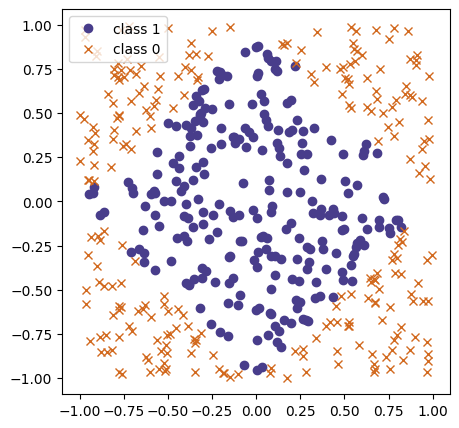

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)


# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [35]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

# created my own accuracy function

def accuracy_fn(y_true, y_pred):
    return np.mean((y_pred >= 0.5) == y_true)

def forward_pass(X, W1, W2, y_true):

    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_

    # First, compute the new predictions `y_pred`
    z2 = np.dot(X, W1)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W2)
    y_pred = sigmoid(z3)

    # Now compute the gradient
    delta3 = y_pred - y_true
    J_W2_grad = a2.T.dot(delta3) 
    delta2 = delta3.dot(W2.T) * a2 * (1 - a2)
    J_W1_grad = X.T.dot(delta2)
    gradient = (J_W1_grad, J_W2_grad)

    # return
    return y_pred, gradient



def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

 Iteration 0
Accuracy: 0.51
Loss: 400.8565255284245
 Iteration 200
Accuracy: 0.50408
Loss: 346.6632657793872
 Iteration 400
Accuracy: 0.5014
Loss: 346.7858644872298
 Iteration 600
Accuracy: 0.49944
Loss: 352.59531158976654
 Iteration 800
Accuracy: 0.49996
Loss: 387.4951858258258
 Iteration 1000
Accuracy: 0.50004
Loss: 430.4707234199838
 Iteration 1200
Accuracy: 0.50008
Loss: 455.8222618615749
 Iteration 1400
Accuracy: 0.5002
Loss: 464.24722668404576


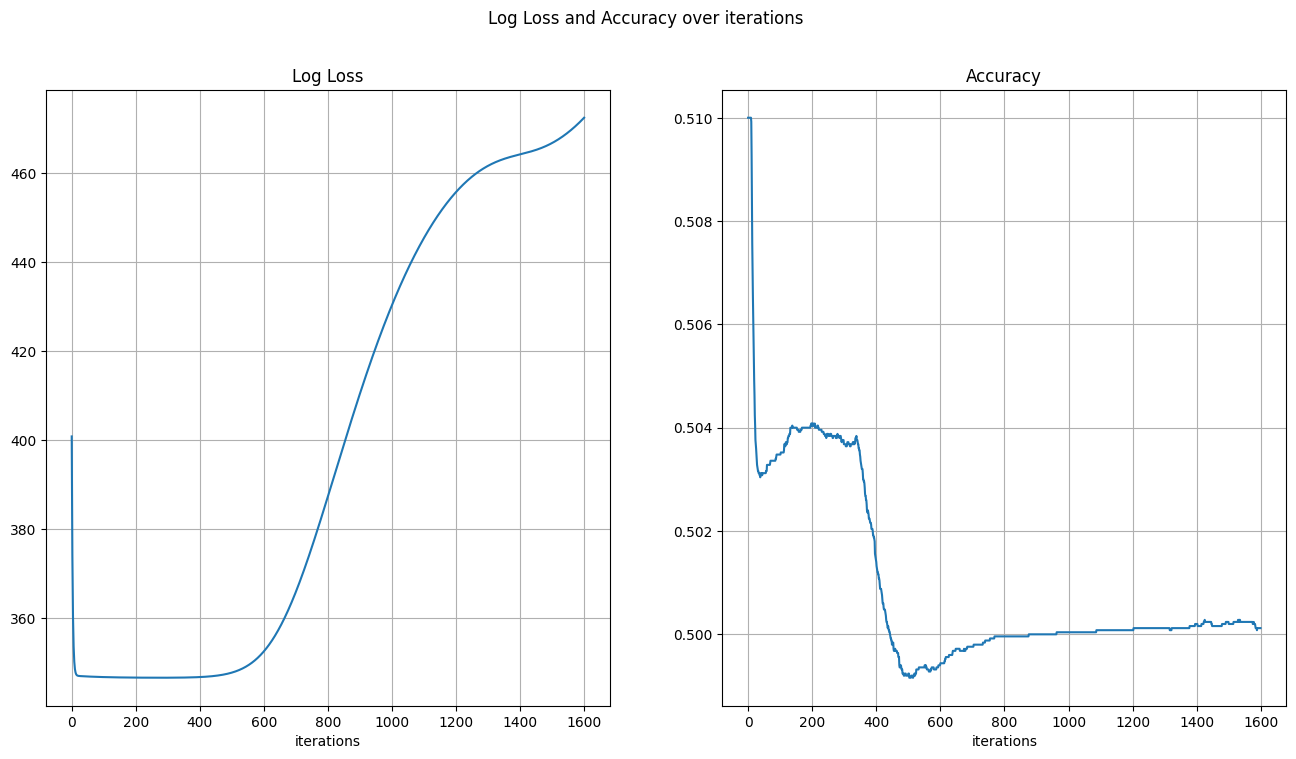

In [ ]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 1600
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%200 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

<b>Observation</b>
- Based on the result of the manual ANN model, it shows that the model that we created is just randomly guessing. Even if we try randomizing its weights

Plot the predicted answers, with mistakes in yellow

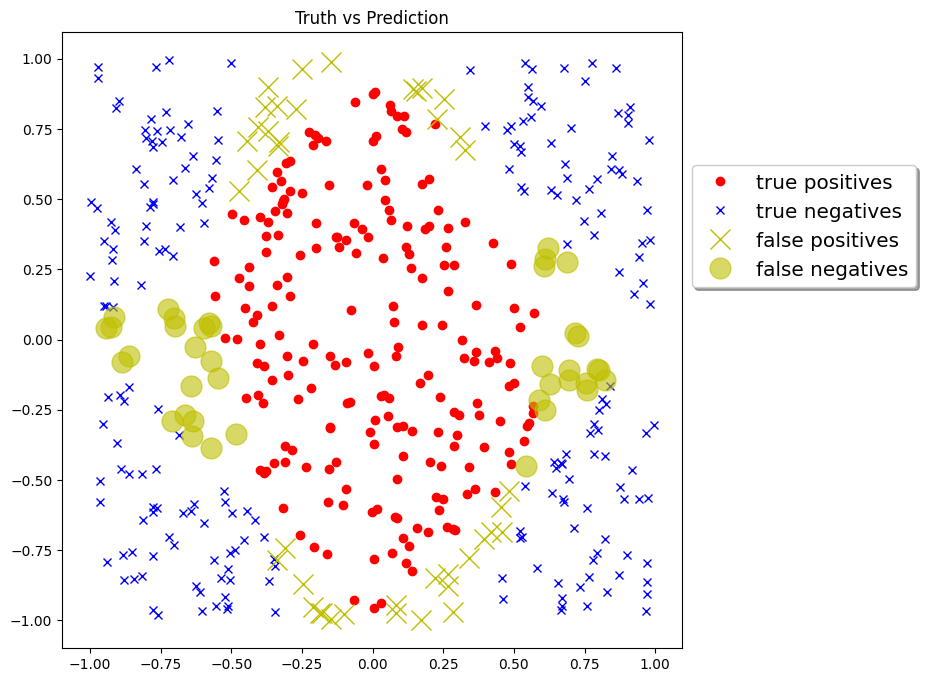

In [47]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

<b>Lets compare it with original to see if the manual model is just guessing classifications

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2621089446.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2621089446.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


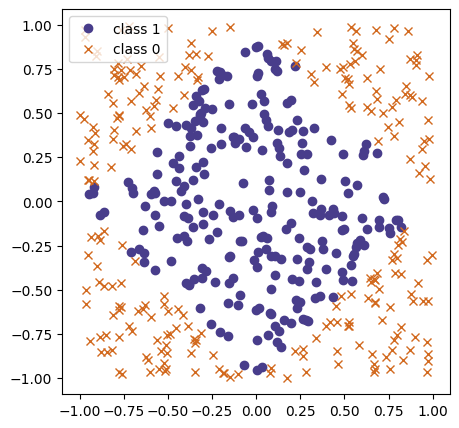

In [48]:
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b>Observation</b>
- After comparing the result of the prediction of the manual ANN and the actual y. It shows that the Manual ANN is having difficulty in determining if the object is object is overlapping or near together.

<font size = 7>Lets try Other shape</font>

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2080486036.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2080486036.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


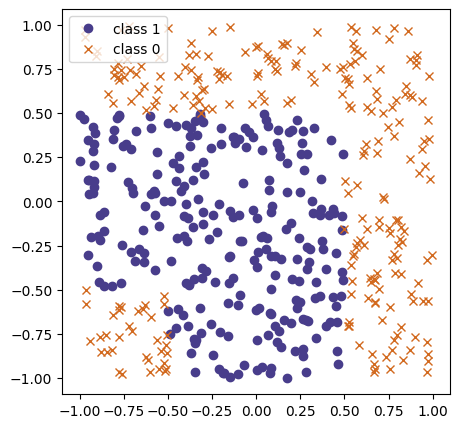

In [49]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b>Train the model</b>


 Iteration 0
Accuracy: 0.488
Loss: 411.71333617793897
 Iteration 200
Accuracy: 0.50144
Loss: 415.2906502452007
 Iteration 400
Accuracy: 0.50192
Loss: 444.6399501689663
 Iteration 600
Accuracy: 0.502256
Loss: 459.9228000700986
 Iteration 800
Accuracy: 0.501824
Loss: 474.6880358325902
 Iteration 1000
Accuracy: 0.501728
Loss: 491.82044135899844
 Iteration 1200
Accuracy: 0.50192
Loss: 517.1002356761977
 Iteration 1400
Accuracy: 0.502016
Loss: 564.8926696790338


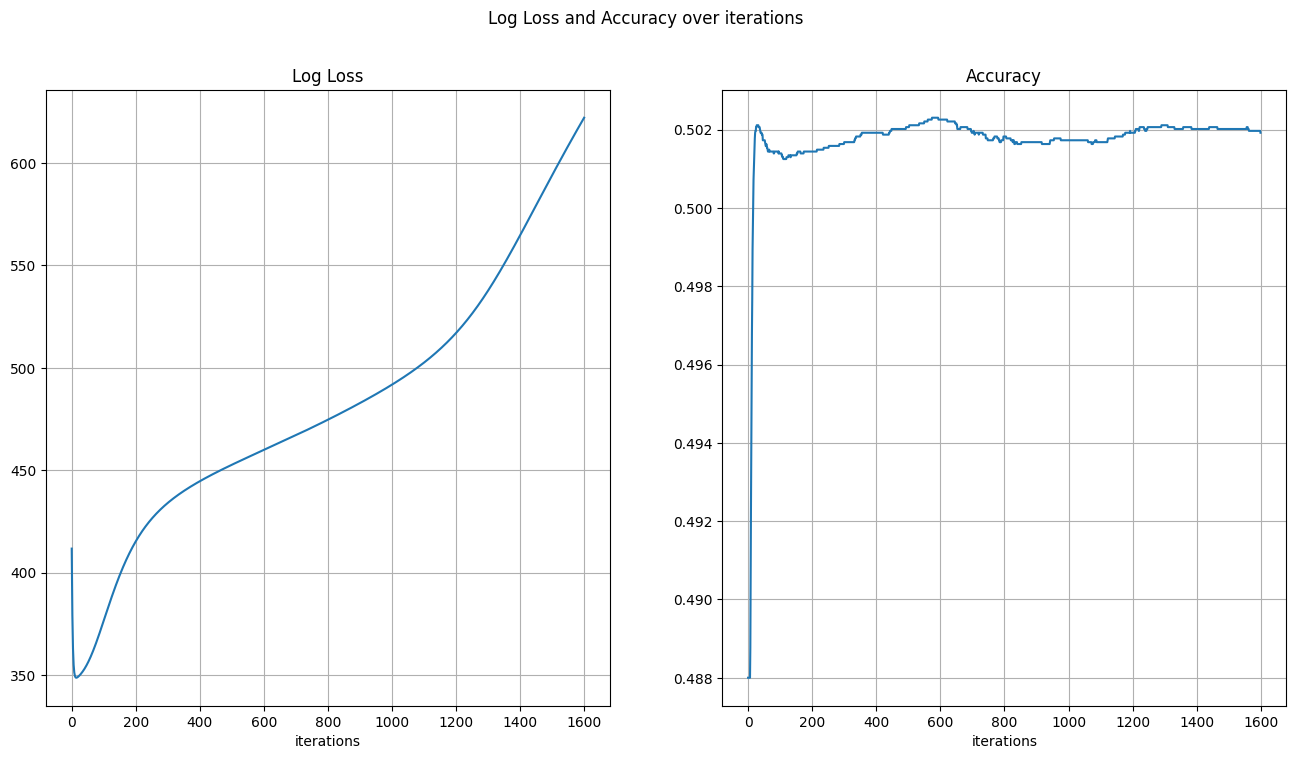

In [50]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 1600
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%200 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

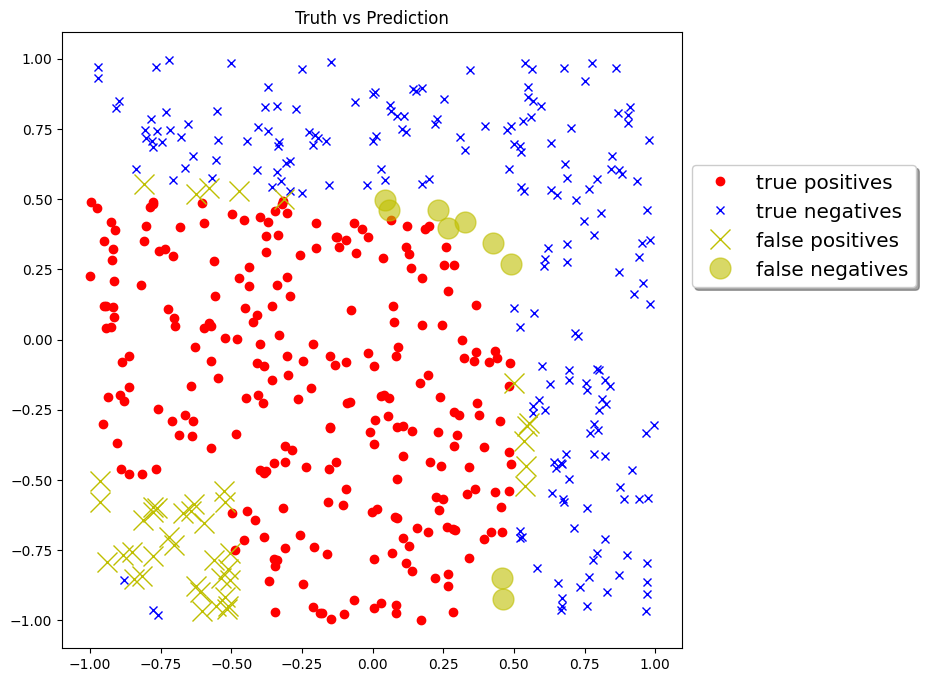

In [51]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2080486036.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2080486036.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


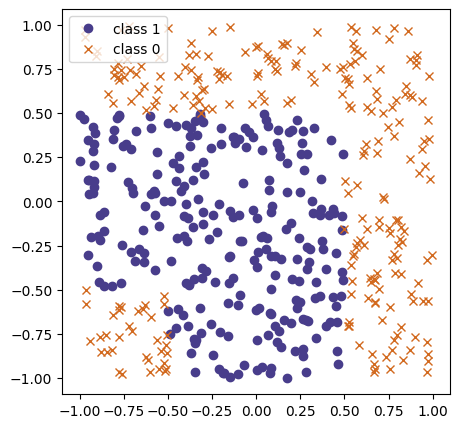

In [52]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b>Observation</b>
- It is evident here that model is having difficulty in classifying overlapping class. If we are going to compare the orginal to the predicted partern by the manual ANN. the manual model almost consider the bottom left as all squares or 1 instead of 0 or x.

<font size = 7>Lets try Other shape</font>

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\1500458930.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\1500458930.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


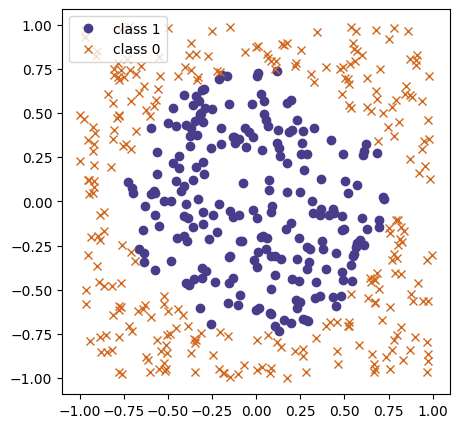

In [53]:
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

 Iteration 0
Accuracy: 0.562
Loss: 375.1949730841179
 Iteration 200
Accuracy: 0.562
Loss: 342.9430555587818
 Iteration 400
Accuracy: 0.562
Loss: 342.98018916635124
 Iteration 600
Accuracy: 0.53348
Loss: 346.21739839477954
 Iteration 800
Accuracy: 0.507192
Loss: 373.2652928549617
 Iteration 1000
Accuracy: 0.504712
Loss: 413.1804539105273
 Iteration 1200
Accuracy: 0.504712
Loss: 431.6931802436951
 Iteration 1400
Accuracy: 0.511408
Loss: 444.9248254760798


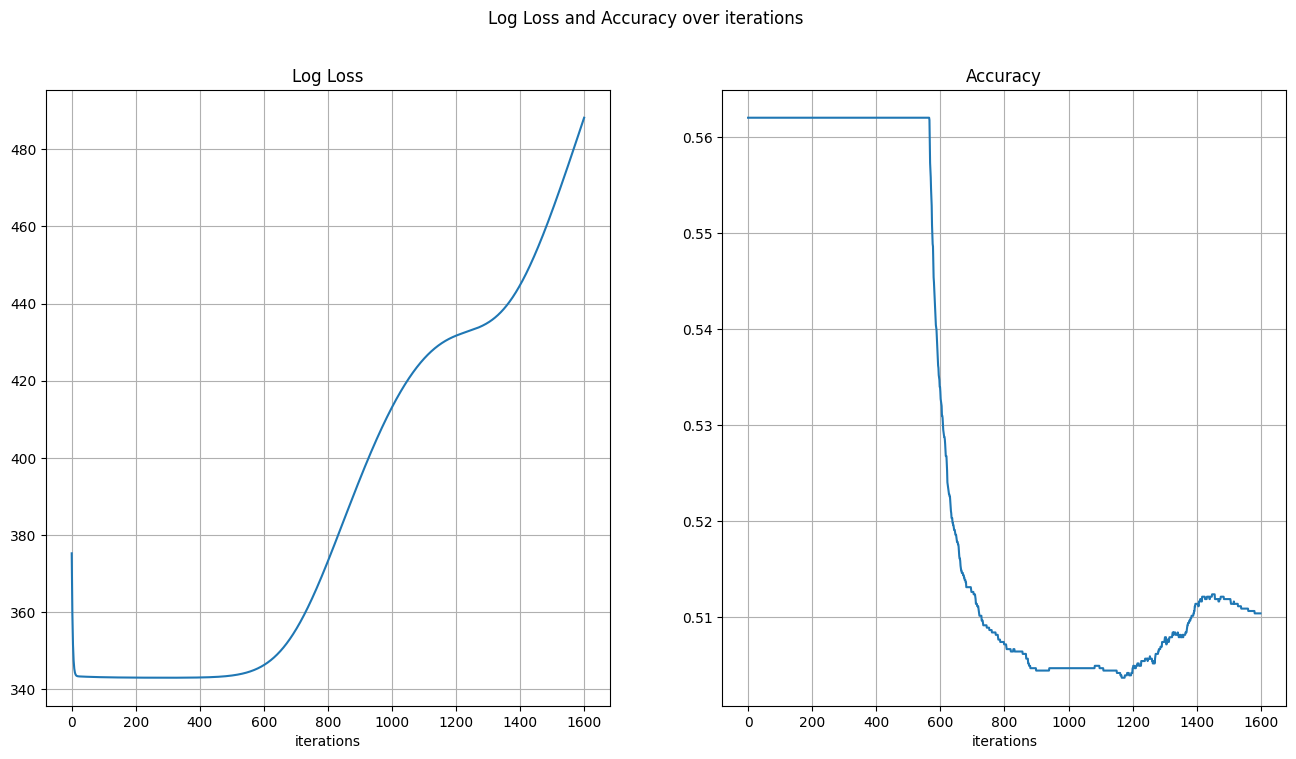

In [55]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 1600
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%200 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

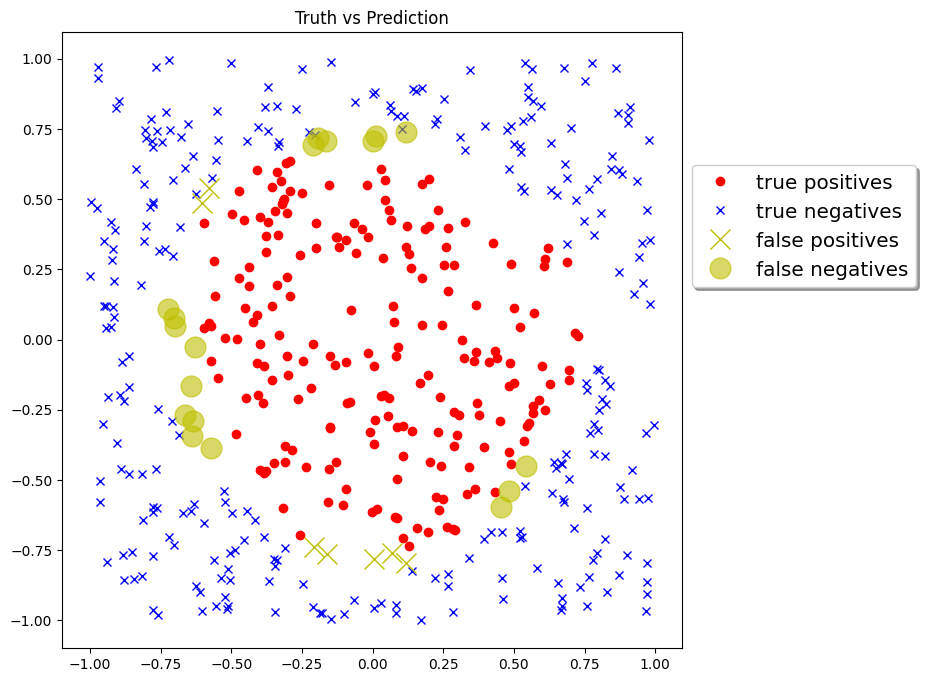

In [56]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\1500458930.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\1500458930.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


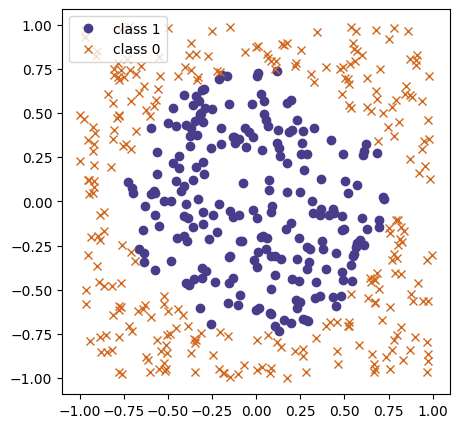

In [57]:
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b> Same with this pattern.

<font size = 7>Lets try Other shape</font>

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\4056417198.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\4056417198.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


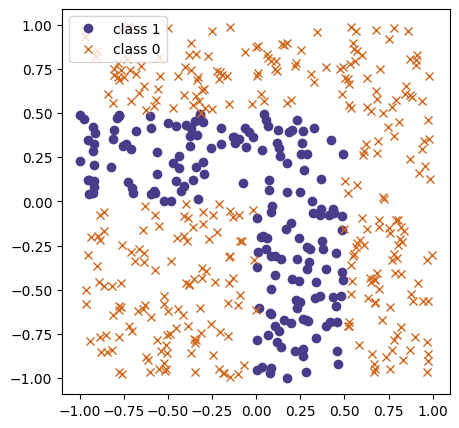

In [58]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

 Iteration 0
Accuracy: 0.654
Loss: 329.79376491342157
 Iteration 200
Accuracy: 0.654
Loss: 325.78289045735755
 Iteration 400
Accuracy: 0.654
Loss: 329.61817545119334
 Iteration 600
Accuracy: 0.654
Loss: 335.3712368985713
 Iteration 800
Accuracy: 0.654
Loss: 341.68118445902405
 Iteration 1000
Accuracy: 0.654
Loss: 351.54588171088693
 Iteration 1200
Accuracy: 0.58008
Loss: 369.6763512447773
 Iteration 1400
Accuracy: 0.564064
Loss: 389.172799814875


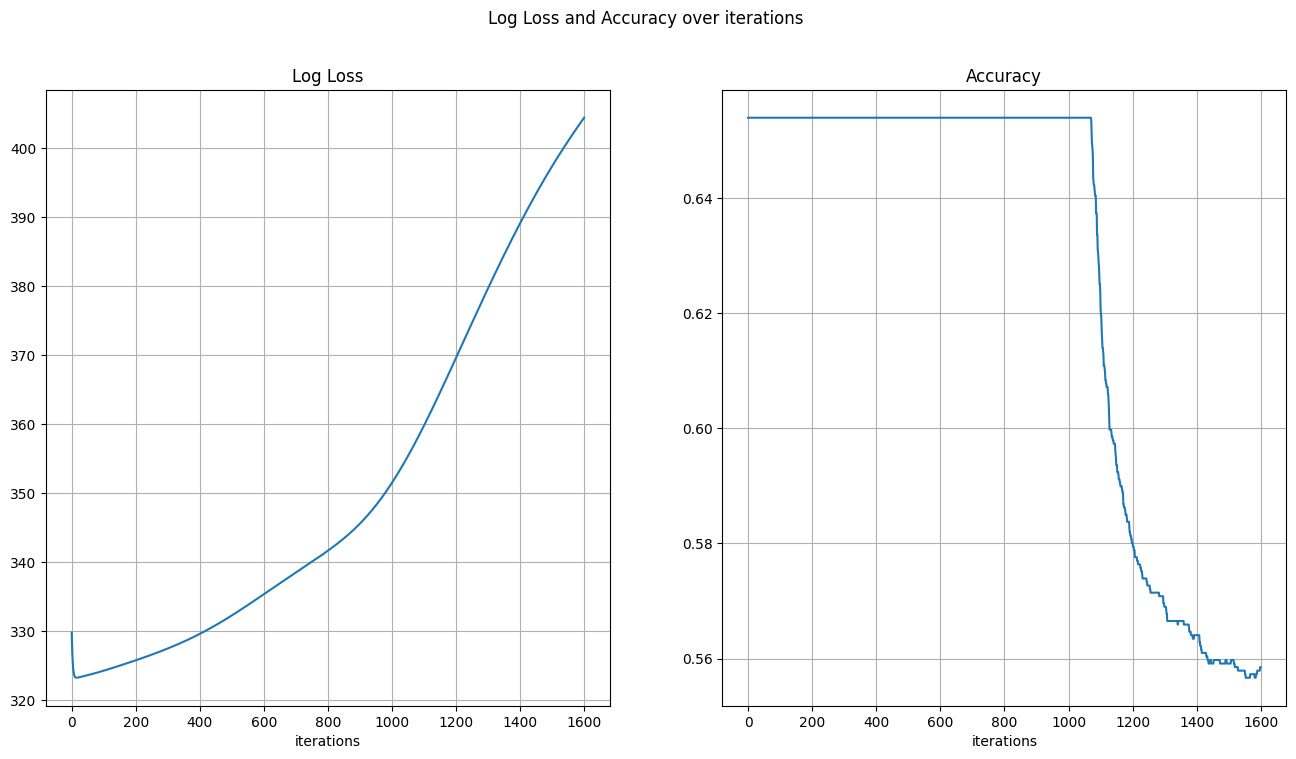

In [59]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 1600
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%200 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

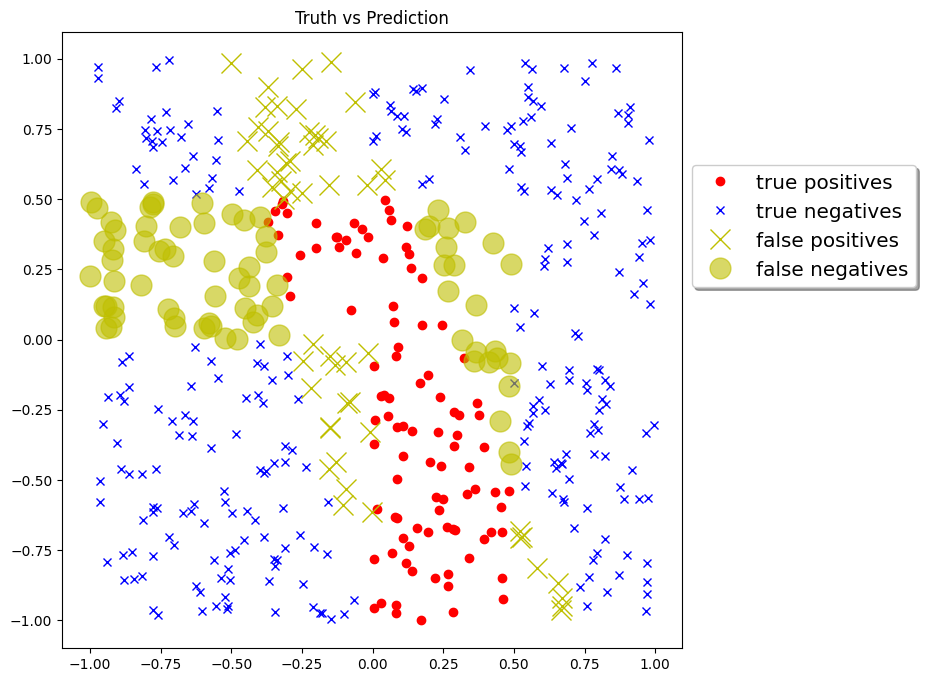

In [60]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\4056417198.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\4056417198.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


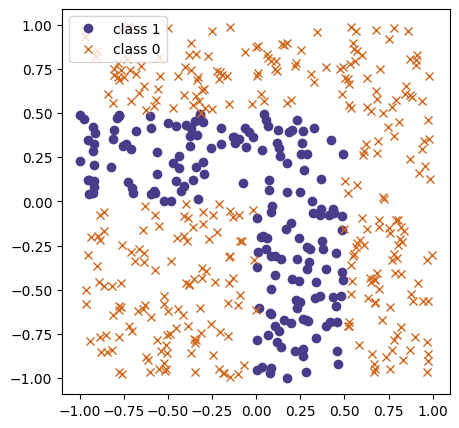

In [61]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b>This is the pattern where the model really gets confused and took long training time to create predictions. Just by comparing the graphs the manual model have difficulty in predicting the horizontal part of the pattern. Since most of the circle or 1 is near the x symbols. Wherein the ANN consider all of it as X.

#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


<font size = 5>For this task we are going to tune the manual model by changing the activation layer or the learning rate to see if it can effectively predict patters.</font>

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\4056417198.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\4056417198.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


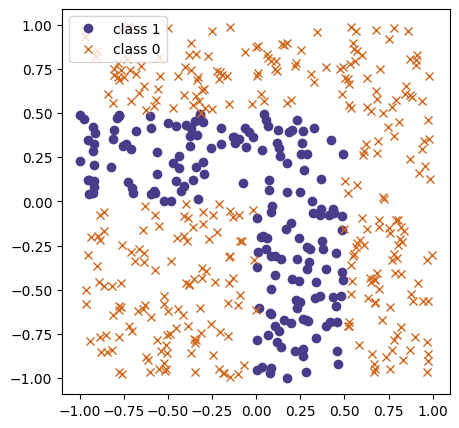

In [62]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<font size = 6>Since this is the hardest patern for the manual ANN. lets use this pattern.

<b> Tune the model

In [63]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def relu_func(values):
    return np.maximum(0, values)

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

# created my own accuracy function

def accuracy_fn(y_true, y_pred):
    return np.mean((y_pred >= 0.5) == y_true)

def forward_pass(X, W1, W2, y_true):
    # Hidden layer
    z2 = np.dot(X, W1)
    a2 = relu_func(z2)  # ReLU hidden layer

    # Output layer
    z3 = np.dot(a2, W2)
    y_pred = sigmoid(z3)  # Sigmoid output layer

    # Backprop
    delta3 = y_pred - y_true.reshape(-1,1)
    J_W2_grad = a2.T.dot(delta3)

    # ReLU derivative for hidden layer
    delta2 = delta3.dot(W2.T) * (a2 > 0).astype(float)
    J_W1_grad = X.T.dot(delta2)

    return y_pred, (J_W1_grad, J_W2_grad)



def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

 Iteration 0
Accuracy: 0.654
Loss: 327.1724006375603
 Iteration 300
Accuracy: 0.550512
Loss: 560.8313240619285
 Iteration 600
Accuracy: 0.54312
Loss: 781.4965959308297
 Iteration 900
Accuracy: 0.542504
Loss: 930.05224644897
 Iteration 1200
Accuracy: 0.541272
Loss: 1049.0646326507792
 Iteration 1500
Accuracy: 0.541272
Loss: 1148.0490793599731


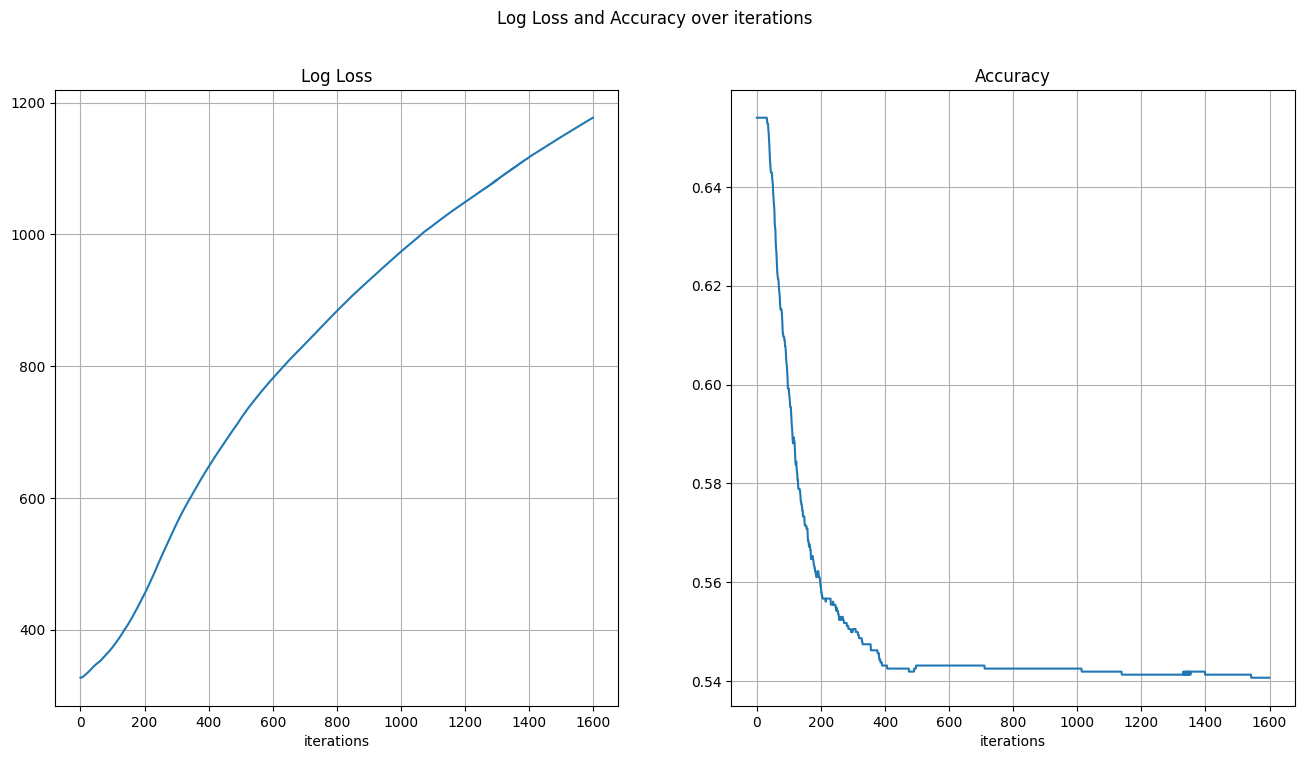

In [71]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 1600
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%300 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

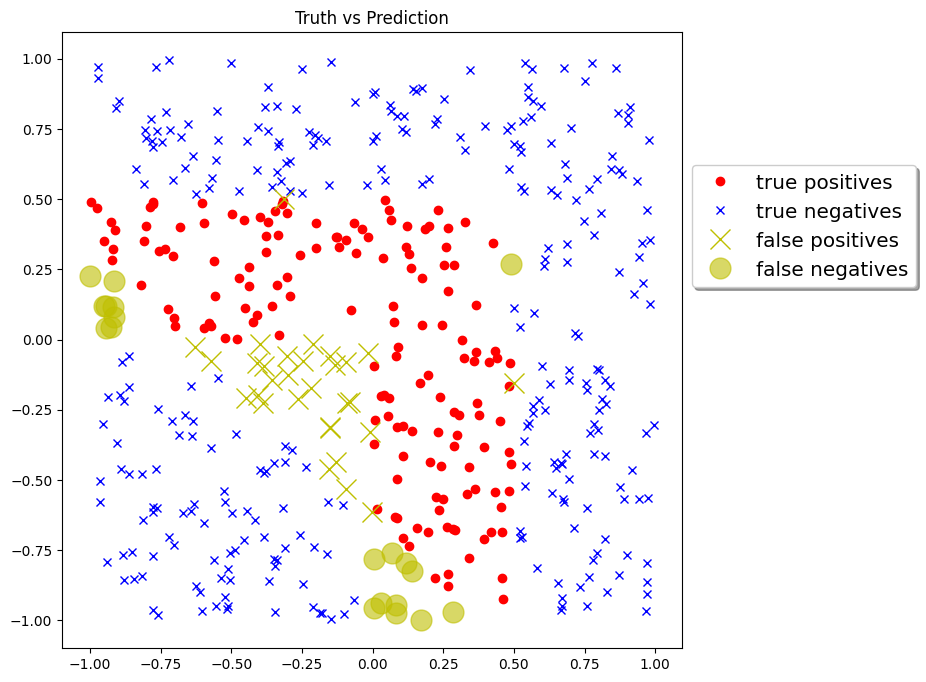

In [72]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\4056417198.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\4056417198.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


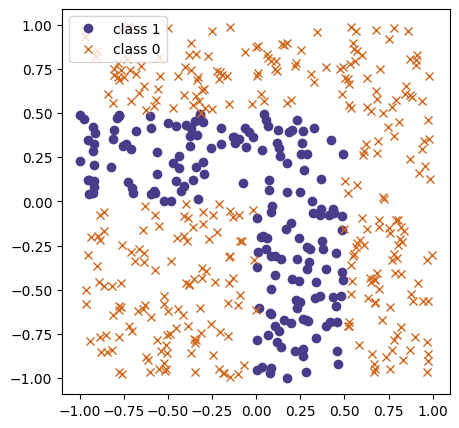

In [66]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b>Observation</b>
- By maintaining the weights but changing the activation of every neuron helps the model in improving its predictions. If we are going to compare it to the sigmoid activation, RELU activation function is more capable in determining the horizontal part of the line.

<font size = 6>Lets try different patterns</font>

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\1697580516.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\1697580516.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


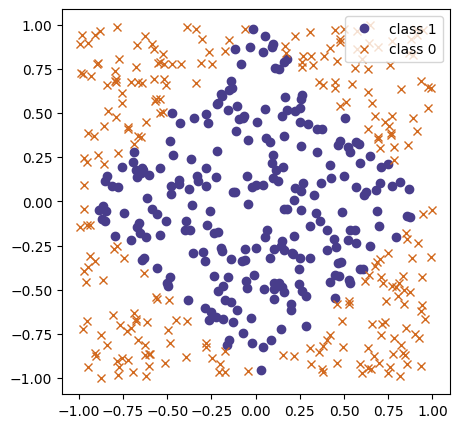

In [ ]:
num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)


# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)



print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

 Iteration 0
Accuracy: 0.514
Loss: 361.8927213705062
 Iteration 300
Accuracy: 0.500784
Loss: 782.8139556994503
 Iteration 600
Accuracy: 0.500616
Loss: 1259.8348290946274
 Iteration 900
Accuracy: 0.50168
Loss: 1656.3165226628948
 Iteration 1200
Accuracy: 0.501792
Loss: 1970.2235579923065
 Iteration 1500
Accuracy: 0.50196
Loss: 2237.469181119016
 Iteration 1800
Accuracy: 0.50196
Loss: 2472.2574003298823


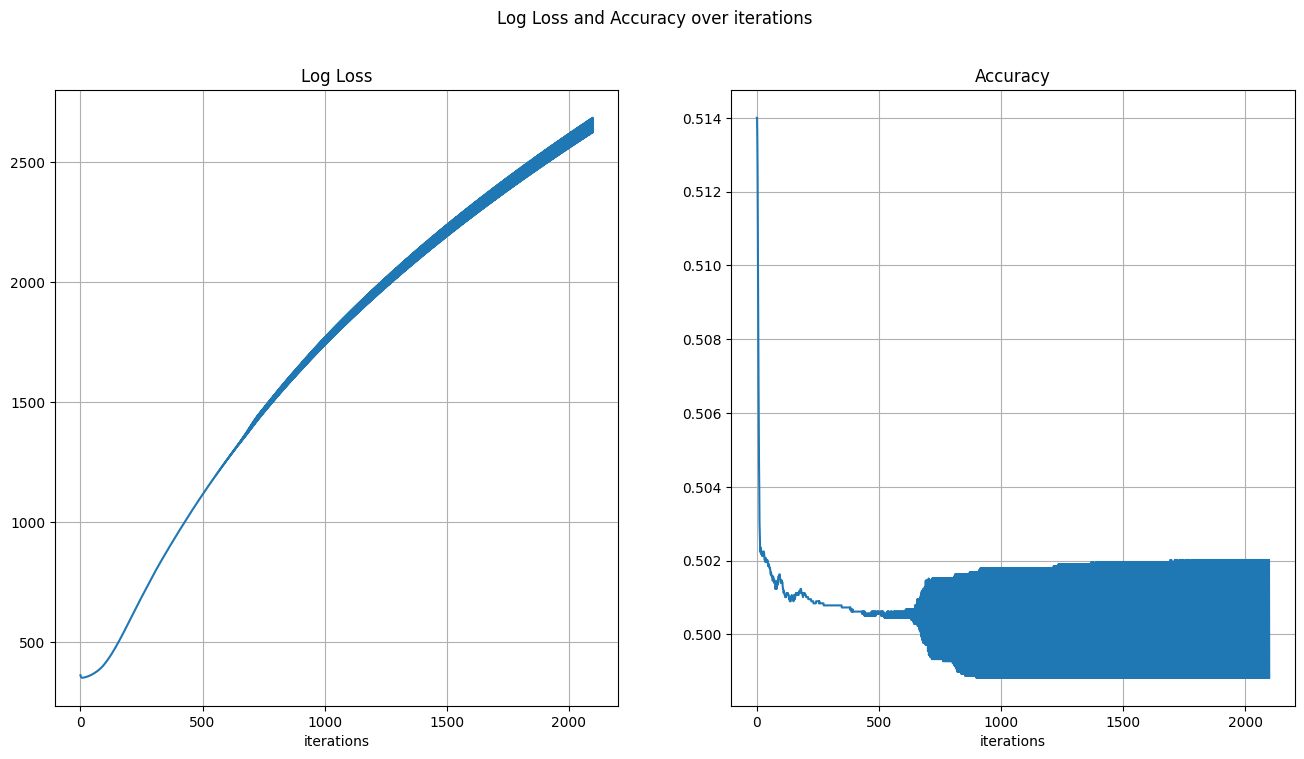

In [78]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 2100
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%300 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

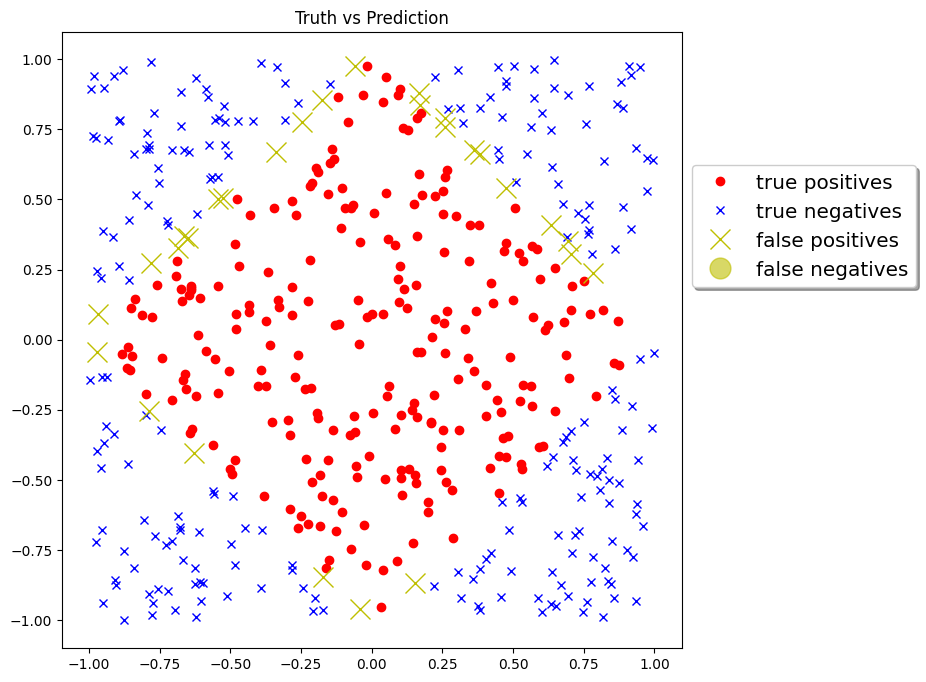

In [79]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2621089446.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2621089446.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


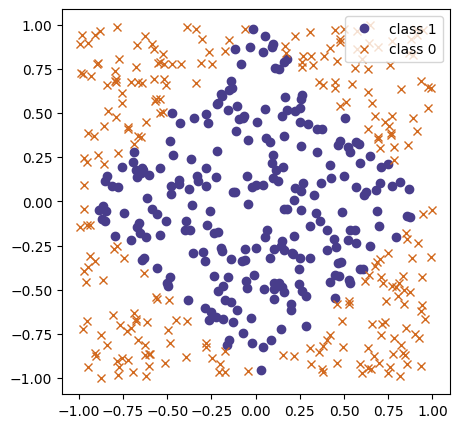

In [80]:
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b>Based on the result, Eventhough the model improves its prediction power compare to the recent. Still the model is having difficulty in predicting the overlapping patterns but the differnce for the current model is that most of its predictions are false positive.

<font size = 6> Lets try different Patter to predict</font>

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\1500458930.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\1500458930.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


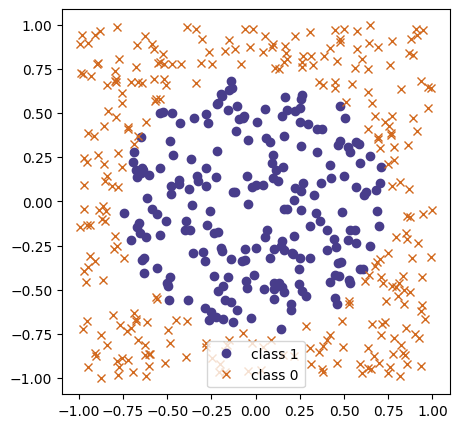

In [81]:
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

 Iteration 0
Accuracy: 0.576
Loss: 346.4552865094635
 Iteration 300
Accuracy: 0.514896
Loss: 758.9363810688947
 Iteration 600
Accuracy: 0.514288
Loss: 1203.5972585935797
 Iteration 900
Accuracy: 0.513984
Loss: 1531.2396343971552
 Iteration 1200
Accuracy: 0.513984
Loss: 1794.6378414237643
 Iteration 1500
Accuracy: 0.514288
Loss: 2019.0021361715876
 Iteration 1800
Accuracy: 0.513984
Loss: 2216.397322091465


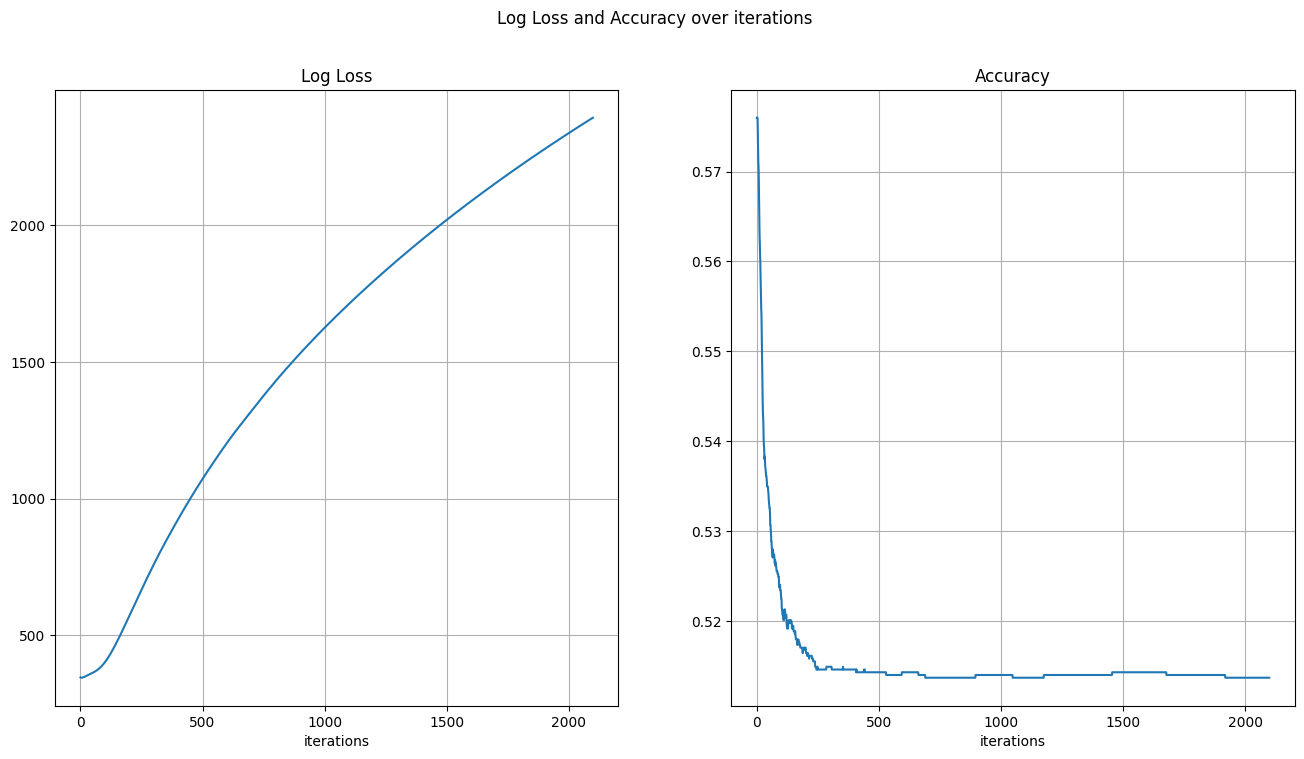

In [82]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 2100
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%300 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

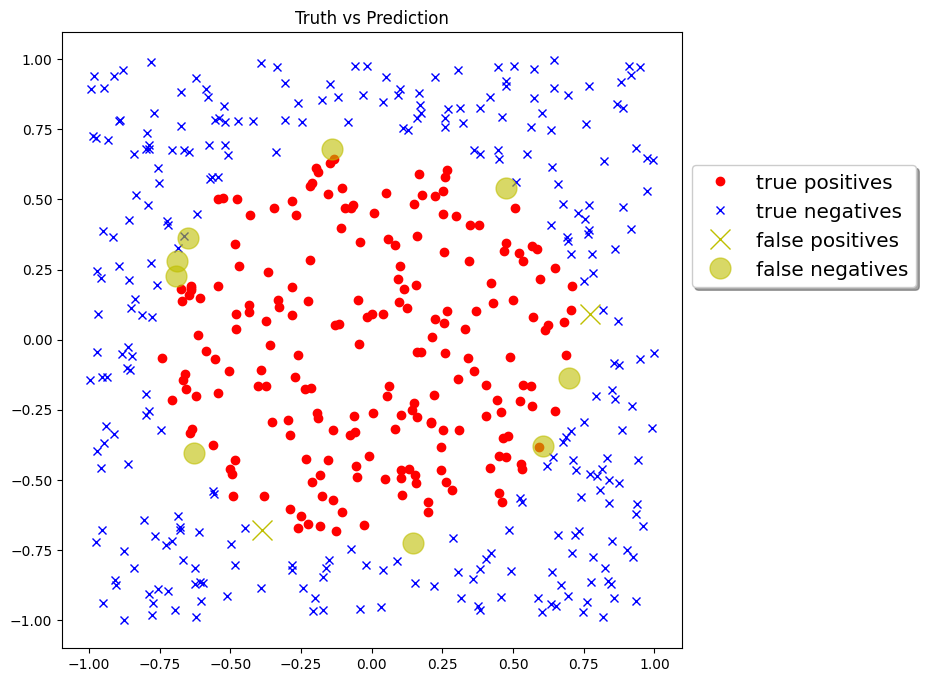

In [83]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

<b>Observation</b>
- The model still having hardtime predicting overlapping patterns. However now it performs an false negatives error results as its mis classification.

<font size = 6>Lets try new pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\3894766120.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\3894766120.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


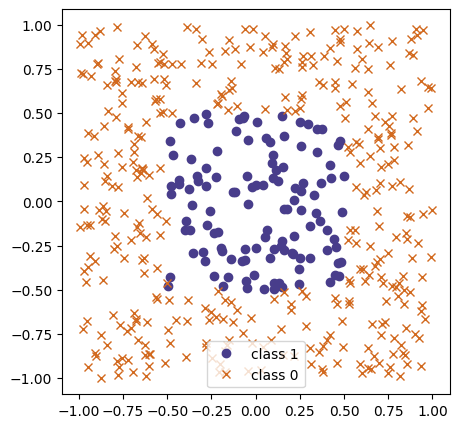

In [84]:
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

 Iteration 0
Accuracy: 0.762
Loss: 300.1429819263355
 Iteration 300
Accuracy: 0.65196
Loss: 528.3483756069278
 Iteration 600
Accuracy: 0.64148
Loss: 813.6675822785107
 Iteration 900
Accuracy: 0.639384
Loss: 1010.7520673813189
 Iteration 1200
Accuracy: 0.638336
Loss: 1166.4971058046733
 Iteration 1500
Accuracy: 0.638336
Loss: 1302.6557071356233
 Iteration 1800
Accuracy: 0.638336
Loss: 1423.2247898930939


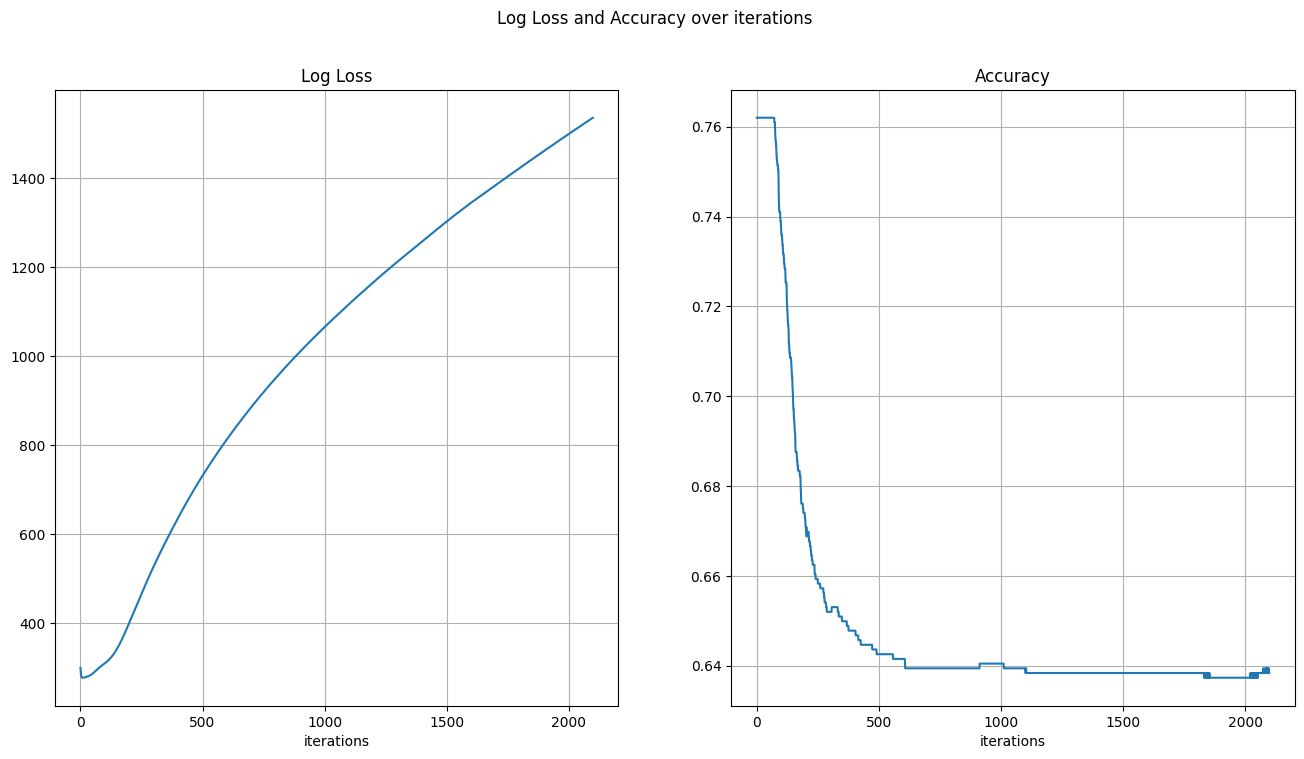

In [85]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 2100
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%300 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

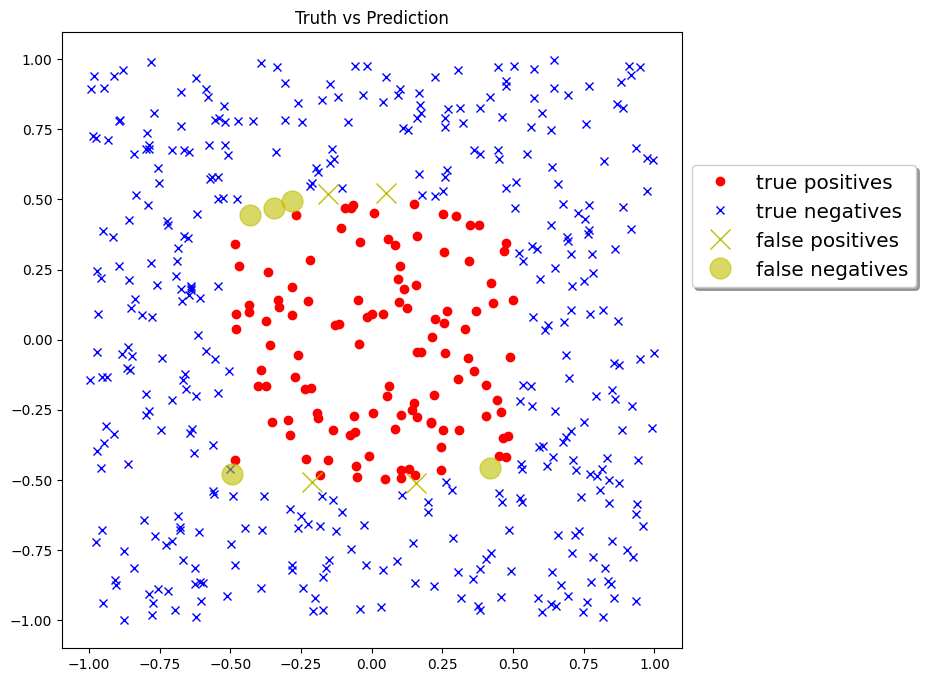

In [86]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\3894766120.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\3894766120.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


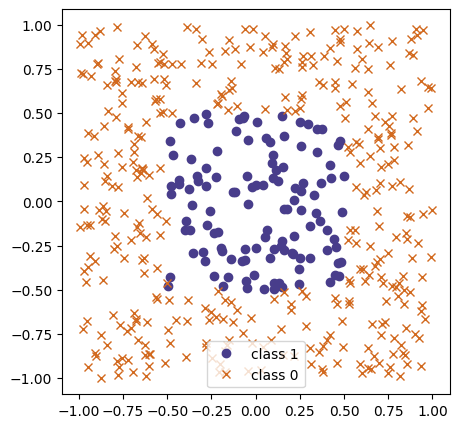

In [87]:
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b>Obseravation</b>
- This time the mode is capable on generalizing elements in this pattern.

<font size = 6>Lets try the last pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2080486036.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2080486036.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


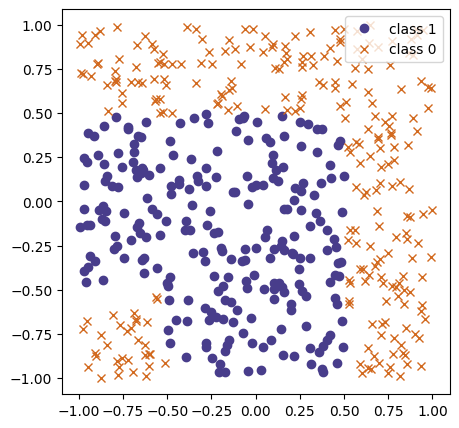

In [92]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

 Iteration 0
Accuracy: 0.518
Loss: 360.8967578310841
 Iteration 300
Accuracy: 0.500432
Loss: 856.7497367520507
 Iteration 600
Accuracy: 0.500432
Loss: 1280.7331243429385
 Iteration 900
Accuracy: 0.50036
Loss: 1626.8294681373675
 Iteration 1200
Accuracy: 0.50036
Loss: 1906.4832423516377
 Iteration 1500
Accuracy: 0.500288
Loss: 2138.4681913472705
 Iteration 1800
Accuracy: 0.500288
Loss: 2333.8418141338134


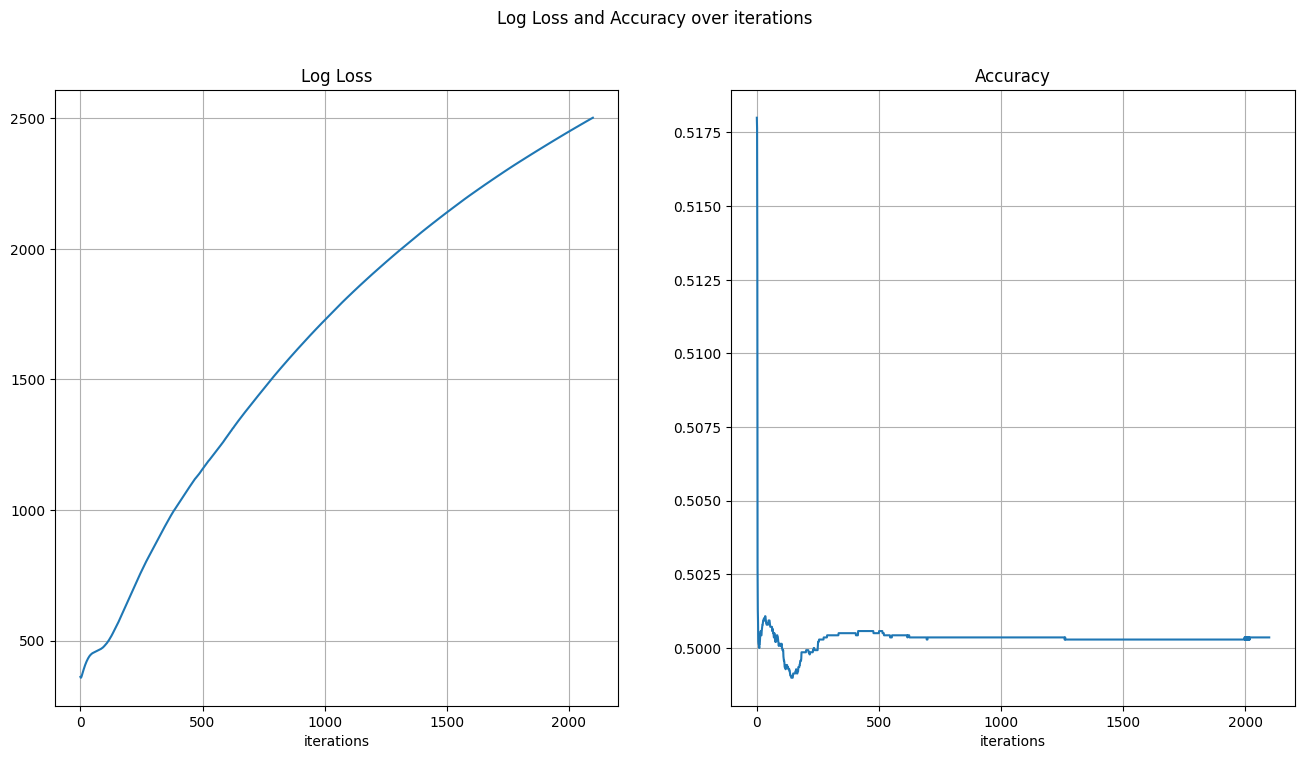

In [93]:
#### Initialize the network parameters



np.random.seed(1241)
W_1 = np.random.uniform(-1,1,(3,4))
W_2 = np.random.uniform(-1,1,(4,1)) 
# I try to create random set of weights to see if the manual ANN actually learns

num_iter = 2100
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    counter = 0 + i
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(x_mat_full, W_1, W_2, y.reshape(-1,1))
    
    ## Update the weight matrices
    J_W1_grad, J_W2_grad = gradient
    W_1 -= learning_rate * J_W1_grad
    W_2 -= learning_rate * J_W2_grad
    
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, y_pred))
    accuracies.append(accuracy_fn(y, y_pred))

    ## Print the loss and accuracy for every 200th iteration
    if counter%300 == 0:
        print(f' Iteration {counter}')
        print(f'Accuracy: {accuracy_fn(y, y_pred)}')
        print(f'Loss: {loss_fn(y, y_pred)}')
    
plot_loss_accuracy(loss_vals, accuracies)

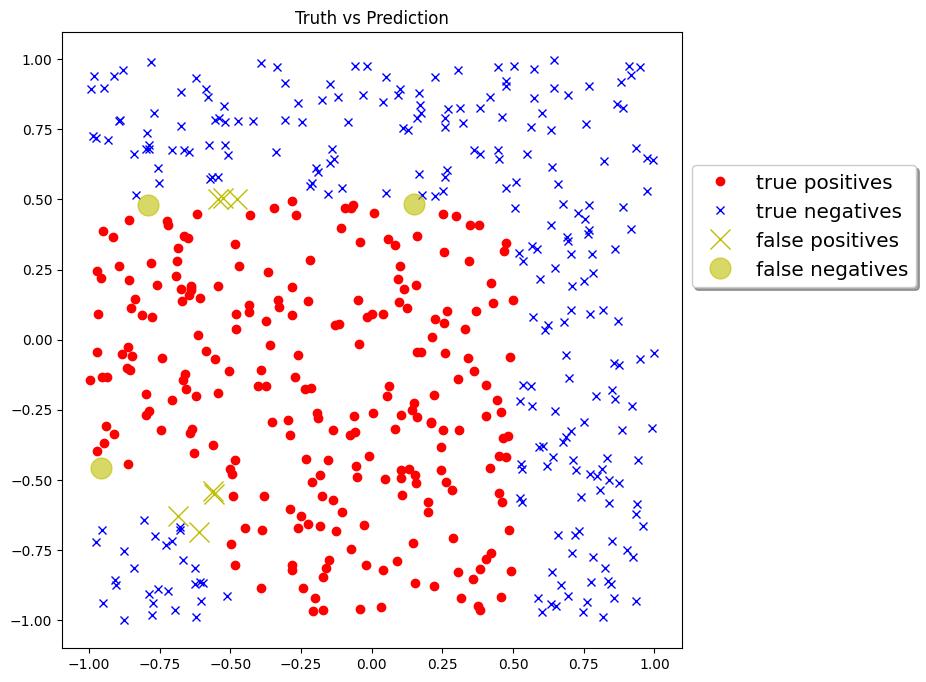

In [94]:
pred1 = (y_pred>=.5).flatten()
pred0 = (y_pred<.5).flatten()

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2080486036.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\Kurt\AppData\Local\Temp\ipykernel_18252\2080486036.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


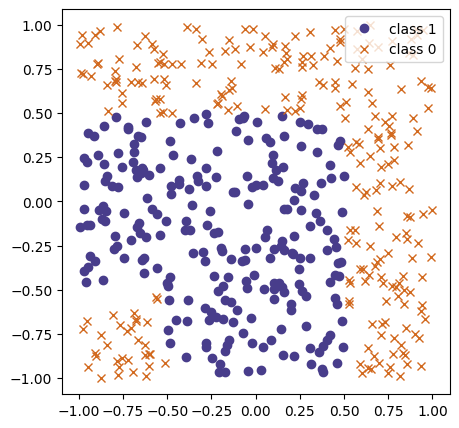

In [95]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<b>Observation</b>
- Eventhough the accuracy shows a low accuracy. If we are going to compare its actual generalization to the patter. It shows a few misclassification.

#### Conclusion

- After accomplishing this activity I was able to learn about forward pass and backward propagation in neural networks. In this activity I was able to learn and perform the manual calculation of the forwardpass and backpropagation of the neural networks. I was also able to learn how hidden and surface layer works. Furthermore, by learning different kind manual computation of activation function I was able to determine when to use sigmoid function and relu function as the activation function in the hidden layers or output layers. Overall, this activity is interesting for me since I was able to see how manual computation of ANN works not just importing the API of tensorflow.